In [2]:
import numpy as np
import sympy as sp
x0=np.array([25723,30379,34473,38485,40514,42400,48337])
def GM11(x0):
    x0=np.array(x0)
    n=len(x0)
    x1=np.cumsum(x0)  #求累加序列
    z=(x1[:-1]+x1[1:])/2.0
    B=np.vstack([-z,np.ones(n-1)]).T
    u=np.linalg.pinv(B)@x0[1:] #最小二乘法拟合参数
    t=sp.var('t')
    x=sp.var('x',cls=sp.Function)  #定义符号变量和函数
    eq=x(t).diff(t)+u[0]*x(t)-u[1]  #定义符号微分方程
    xt0=sp.dsolve(eq,ics={x(0):x0[0]})  #求解符号微分方程
    xt=xt0.args[1]  #提取方程中的符号解
    xt=sp.lambdify(t,xt,'numpy')  #转换为匿名函数
    t=np.arange(n,n+4)
    xt1=xt(t)  #求模型的预测值 
    x0_pred=np.diff(xt1) #还原数据
    t=np.arange(n)
    delta=np.diff(xt(t))-x0[:-1]
    print('预测值：',x0_pred,'方程：',xt0,'MSE: ',sum(delta**2/x0[:-1])/n)
    return x0_pred
GM11(x0)

预测值： [56505.91918061 61473.74703365 66878.33114045] 方程： Eq(x(t), 356328.991038063*exp(0.0842648092490046*t) - 330605.991038063) MSE:  415.964633509007


array([56505.91918061, 61473.74703365, 66878.33114045])

往后各年预测值为：
[1079.38044724 1125.65457636 1173.91252409 1224.23933874 1276.72371473
 1331.45814889 1388.53910348 1448.0671762  1510.14727748 1574.88881535
 1642.40588828 1712.81748628 1786.24770054 1862.8259422  1942.68717036
 2025.97212997 2112.82759985 2203.40665138 2297.86891827 2396.38087787]


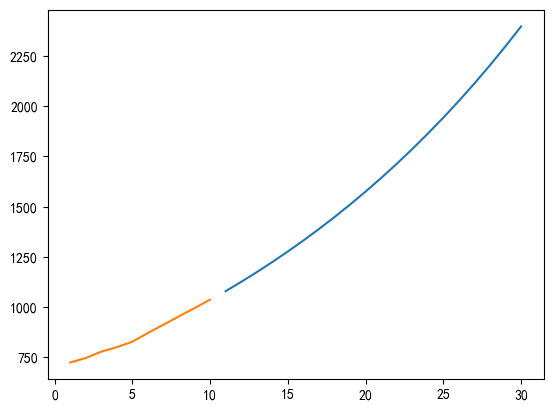

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
history_data = [724.57,746.62,778.27,800.8,827.75,871.1,912.37,954.28,995.01,1037.2]
def GM11(history_data,forcast_steps):
    n = len(history_data) # 确定历史数据体量
    X0 = np.array(history_data) # 向量化
    # 级比检验的部分可以自行补充
    lambda0=np.zeros(n-1)
    for i in range(n-1):
        if history_data[i]:
            lambda0[i]=history_data[i+1]/history_data[i]
        if lambda0[i]<np.exp(-2/(n+1)) or lambda0[i]>np.exp(2/n+2):
            print("GM11模型失效")
            return -1
    #累加生成
    history_data_agg = [sum(history_data[0:i+1]) for i in range(n)]
    X1 = np.array(history_data_agg)
    #计算数据矩阵B和数据向量Y
    B = np.zeros([n-1,2])
    Y = np.zeros([n-1,1])
    for i in range(0,n-1):
        B[i][0] = -0.5*(X1[i] + X1[i+1])
        B[i][1] = 1
        Y[i][0] = X0[i+1]
    #计算GM(1,1)微分方程的参数a和b
    A = np.linalg.inv(B.T.dot(B)).dot(B.T).dot(Y)
    a = A[0][0]
    b = A[1][0]
    #建立灰色预测模型
    XX0 = np.zeros(n)
    XX0[0] = X0[0]
    for i in range(1,n):
        XX0[i] = (X0[0] - b/a)*(1-math.exp(a))*math.exp(-a*(i))
    #模型精度的后验差检验
    e=sum(X0-XX0)/n
    #求历史数据平均值
    aver=sum(X0)/n
    #求历史数据方差
    s12=sum((X0-aver)**2)/n
    #求残差方差
    s22=sum(((X0-XX0)-e)**2)/n
    #求后验差比值
    C = s22 / s12   
    #求小误差概率
    cobt = 0
    for i in range(0,n):
        if abs((X0[i] - XX0[i]) - e) < 0.6754*math.sqrt(s12):
            cobt = cobt+1
        else:
            cobt = cobt
    P = cobt / n
    f = np.zeros(forcast_steps)
    if (C < 0.35 and P > 0.95):
        #预测精度为一级
        print('往后各年预测值为：')
        for i in range(0,forcast_steps):
            f[i] = (X0[0] - b/a)*(1-math.exp(a))*math.exp(-a*(i+n))    
        print(f)
    else:
        print('灰色预测法不适用')
    return f
f=GM11(history_data,20)
plt.plot(range(11,31),f)
plt.plot(range(1,11),history_data)
plt.show()

[[2.2578e+04 2.7569e+04 4.9870e+03 2.5677e+03 2.6798e+02 1.5429e+00
  1.1720e+00]
 [2.5698e+04 2.9484e+04 5.0480e+03 3.1310e+03 3.4851e+02 1.8546e+00
  1.2514e+00]
 [2.7896e+04 3.1589e+04 5.1290e+03 3.8582e+03 4.2910e+02 2.0369e+00
  1.0254e+00]
 [2.9540e+04 3.4894e+04 5.5690e+03 4.4177e+03 5.4129e+02 2.2589e+00
  1.1890e+00]
 [3.1058e+04 3.6478e+04 5.7830e+03 5.1581e+03 6.4725e+02 2.4276e+00
  1.4213e+00]
 [3.5980e+04 3.8695e+04 6.0450e+03 6.1501e+03 7.3645e+02 2.5678e+00
  1.5304e+00]
 [3.9483e+04 4.0746e+04 6.2590e+03 7.0028e+03 8.5000e+02 2.8546e+00
  1.7421e+00]]
[[0.         0.         0.         0.         0.         0.
  0.20454863]
 [0.18456078 0.14532898 0.04795597 0.12700954 0.13836294 0.23763056
  0.31533417]
 [0.31458148 0.30507703 0.11163522 0.29097427 0.27682897 0.37661051
  0.        ]
 [0.41183082 0.55589284 0.45754717 0.41712701 0.46958867 0.54585652
  0.22826845]
 [0.50162674 0.6761023  0.62578616 0.584068   0.65164427 0.67446825
  0.55239291]
 [0.7927832  0.84435   

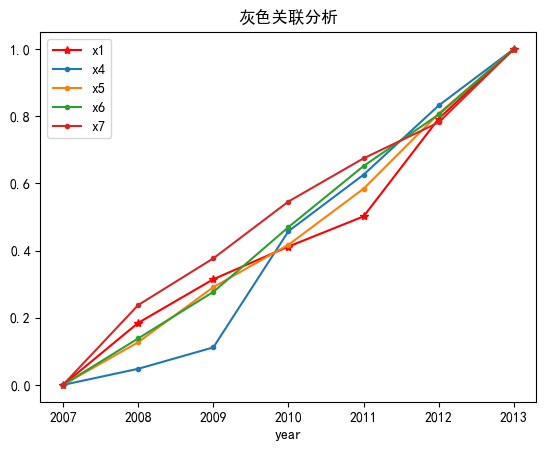

 x4,x5,x6,x7 与 x1之间的灰色关联度分别为：
[0.95294652 0.92674346 0.9004367  0.80079348]


In [1]:
#导入相关库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 解决图标题中文乱码问题
import matplotlib as mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
#导入数据
data=pd.read_excel('huiseguanlian.xlsx')
# print(data)
#提取变量名 x1 -- x7
label_need=data.keys()[1:]
# print(label_need)
#提取上面变量名下的数据
data1=data[label_need].values
print(data1)
#0.002~1区间归一化
[m,n]=data1.shape #得到行数和列数
data2=data1.astype('float')
data3=data2
ymin=0
ymax=1
for j in range(0,n):
    d_max=max(data2[:,j])
    d_min=min(data2[:,j])
    data3[:,j]=(ymax-ymin)*(data2[:,j]-d_min)/(d_max-d_min)+ymin
print(data3)
# 绘制 x1,x4,x5,x6,x7 的折线图
t=range(2007,2014)
plt.plot(t,data3[:,0],'*-',c='red')
for i in range(4):
    plt.plot(t,data3[:,2+i],'.-')
plt.xlabel('year')
plt.legend(['x1','x4','x5','x6','x7'])
plt.title('灰色关联分析')
plt.show()
# 得到其他列和参考列相等的绝对值
for i in range(3,7):
    data3[:,i]=np.abs(data3[:,i]-data3[:,0])
#得到绝对值矩阵的全局最大值和最小值
data4=data3[:,3:7]
d_max=np.max(data2)
d_min=np.min(data2)
a=0.5 #定义分辨系数
# 计算灰色关联矩阵
data4=(d_min+a*d_max)/(data4+a*d_max)
xishu=np.mean(data4, axis=0)
print(' x4,x5,x6,x7 与 x1之间的灰色关联度分别为：')
print(xishu)